![](cars.jpg)

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
%matplotlib inline
style.use('seaborn')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.model_selection import cross_val_score
from sklearn import metrics

In [2]:
df = pd.read_csv('cars_info.csv')


In [3]:
df.head()


,Unnamed: 0,car_name,brand,model,min_cost_price,max_cost_price,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,0,Maruti Alto,Maruti,Alto,3.570039e+05,4.654015e+05,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,1,Hyundai Grand,Hyundai,Grand,7.110000e+05,7.480000e+05,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,2,Hyundai i20,Hyundai,i20,8.540829e+05,1.307926e+06,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,3,Maruti Alto,Maruti,Alto,3.570039e+05,4.654015e+05,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,4,Ford Ecosport,Ford,Ecosport,1.014000e+06,1.379000e+06,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15411 entries, 0 to 15410
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         15411 non-null  int64  
 1   car_name           15411 non-null  object 
 2   brand              15411 non-null  object 
 3   model              15411 non-null  object 
 4   min_cost_price     15411 non-null  float64
 5   max_cost_price     15411 non-null  float64
 6   vehicle_age        15411 non-null  int64  
 7   km_driven          15411 non-null  int64  
 8   seller_type        15411 non-null  object 
 9   fuel_type          15411 non-null  object 
 10  transmission_type  15411 non-null  object 
 11  mileage            15411 non-null  float64
 12  engine             15411 non-null  int64  
 13  max_power          15411 non-null  float64
 14  seats              15411 non-null  int64  
 15  selling_price      15411 non-null  int64  
dtypes: float64(4), int64(6

In [5]:
df.isnull().sum()

Unnamed: 0           0
car_name             0
brand                0
model                0
min_cost_price       0
max_cost_price       0
vehicle_age          0
km_driven            0
seller_type          0
fuel_type            0
transmission_type    0
mileage              0
engine               0
max_power            0
seats                0
selling_price        0
dtype: int64

In [6]:
df.describe()

,Unnamed: 0,min_cost_price,max_cost_price,vehicle_age,km_driven,mileage,engine,max_power,seats,selling_price
count,15411.000000,1.541100e+04,1.541100e+04,15411.000000,1.541100e+04,15411.000000,15411.000000,15411.000000,15411.000000,1.541100e+04
mean,9811.857699,5.892971e+06,1.962624e+06,6.036338,5.561648e+04,19.701151,1486.057751,100.588254,5.325482,7.749711e+05
std,5643.418542,5.669851e+07,2.889636e+06,3.013291,5.161855e+04,4.171265,521.106696,42.972979,0.807628,8.941284e+05
min,0.000000,3.110000e+05,4.360000e+05,0.000000,1.000000e+02,4.000000,793.000000,38.400000,0.000000,4.000000e+04
25%,4906.500000,6.680000e+05,8.728667e+05,4.000000,3.000000e+04,17.000000,1197.000000,74.000000,5.000000,3.850000e+05
50%,9872.000000,8.550000e+05,1.206000e+06,6.000000,5.000000e+04,19.670000,1248.000000,88.500000,5.000000,5.560000e+05
75%,14668.500000,1.284000e+06,1.743000e+06,8.000000,7.000000e+04,22.700000,1582.000000,117.300000,5.000000,8.250000e+05
max,19543.000000,9.880000e+08,9.110000e+07,29.000000,3.800000e+06,33.540000,6592.000000,626.000000,9.000000,3.950000e+07


In [7]:
df.columns


Index(['Unnamed: 0', 'car_name', 'brand', 'model', 'min_cost_price',
       'max_cost_price', 'vehicle_age', 'km_driven', 'seller_type',
       'fuel_type', 'transmission_type', 'mileage', 'engine', 'max_power',
       'seats', 'selling_price'],
      dtype='object')

In [8]:
print(df['fuel_type'].value_counts())

Petrol      7643
Diesel      7419
CNG          301
LPG           44
Electric       4
Name: fuel_type, dtype: int64


In [9]:
print(df['seller_type'].value_counts())

Dealer              9539
Individual          5699
Trustmark Dealer     173
Name: seller_type, dtype: int64


In [10]:
print(df['transmission_type'].value_counts())

Manual       12225
Automatic     3186
Name: transmission_type, dtype: int64


In [11]:
fuel_type = df['fuel_type']


In [12]:
seller_type = df['seller_type']


In [13]:
transmission_type = df['transmission_type']

In [14]:
selling_price = df['selling_price']


In [15]:
from matplotlib import style

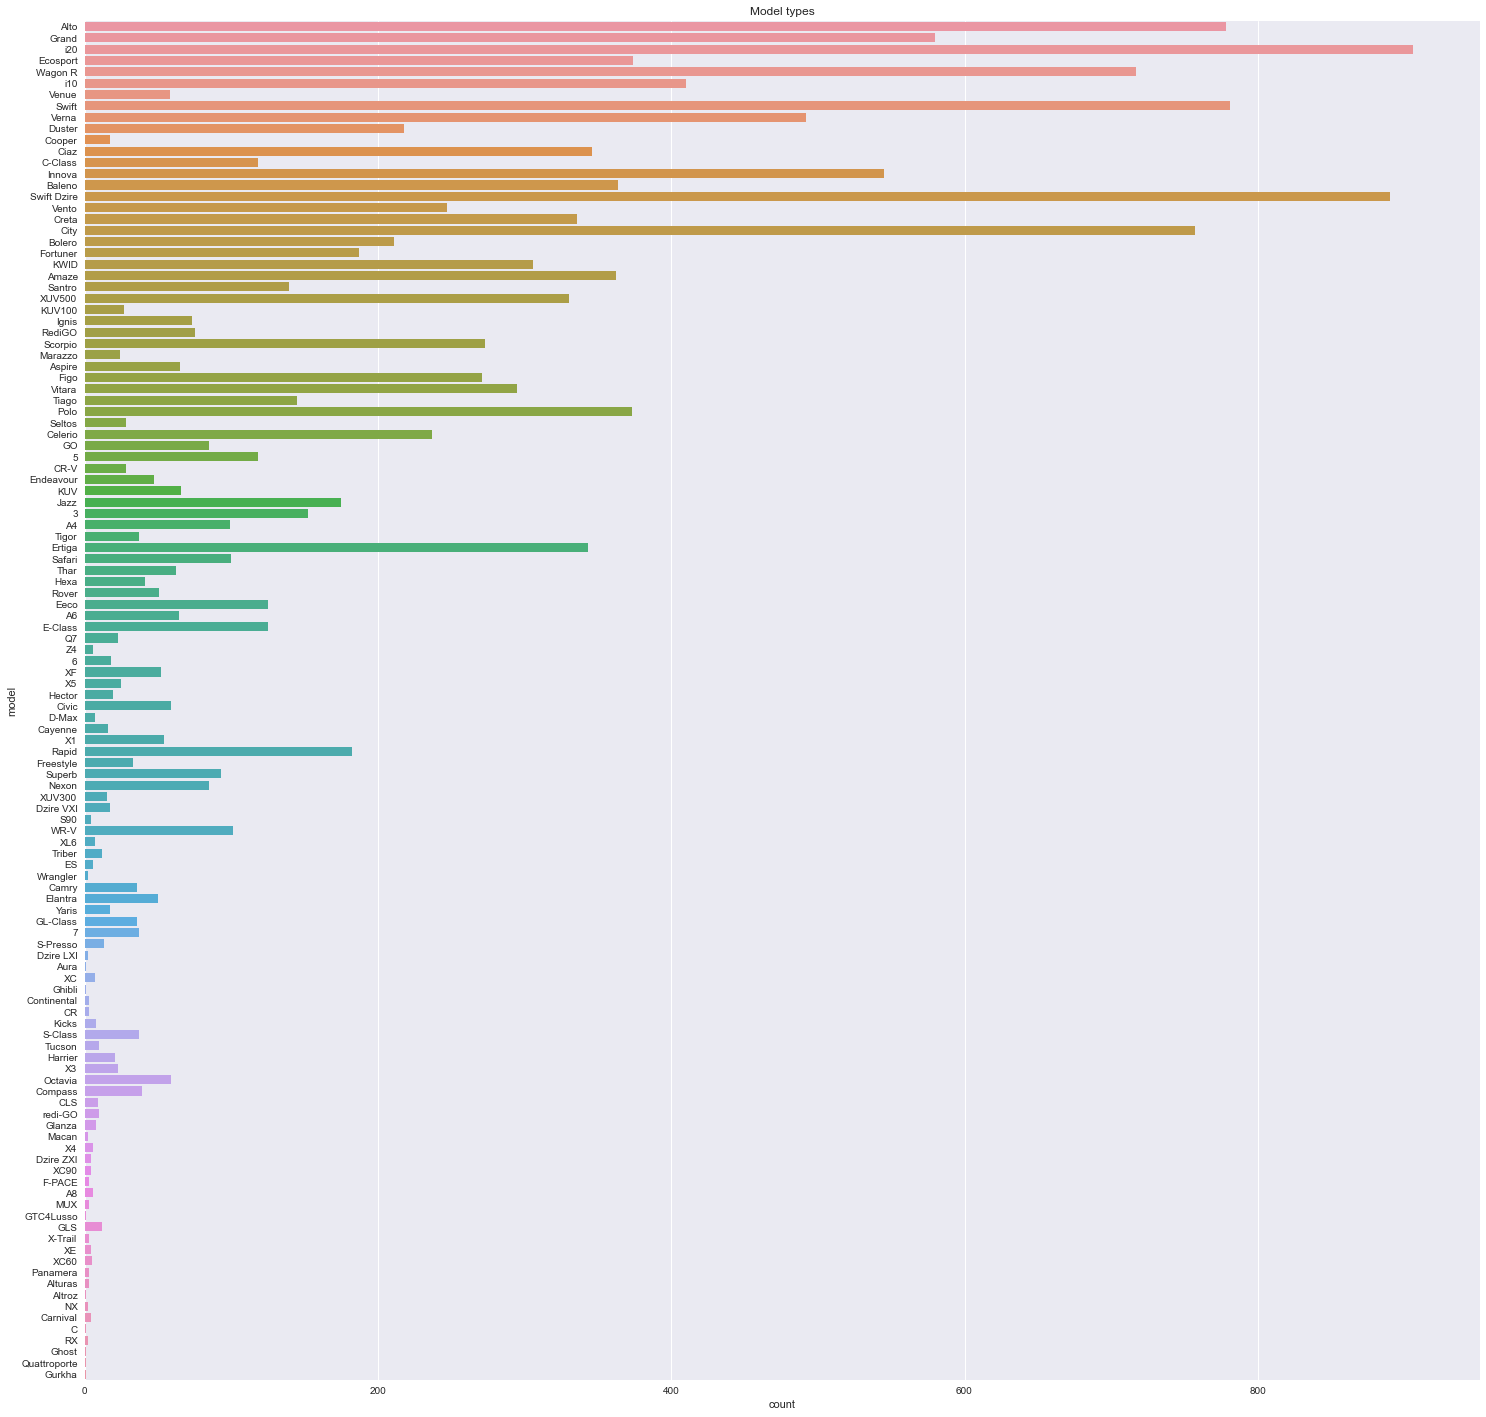

In [8]:
plt.figure(figsize=(25,25))
sns.countplot(y='model', data=df)
plt.title('Model types')
plt.show()

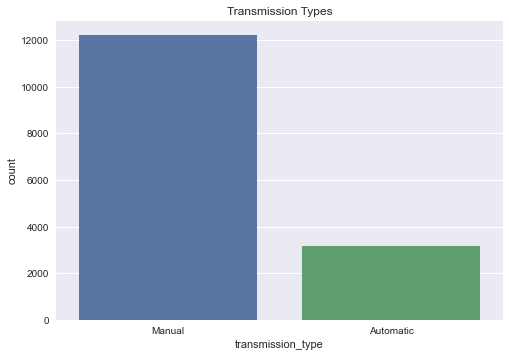

In [9]:
sns.countplot(x='transmission_type', data=df)
plt.title('Transmission Types')
plt.show()

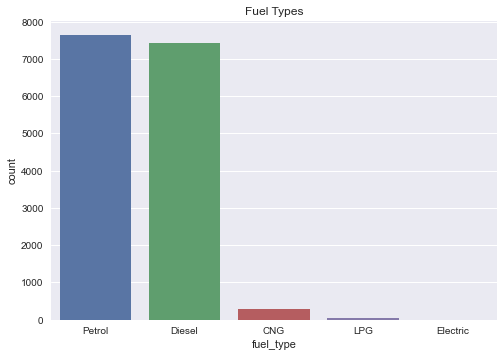

In [10]:
sns.countplot(x='fuel_type', data=df)
plt.title('Fuel Types')
plt.show()

In [11]:
print(df['model'].value_counts())
print("\n\n")
print(df['transmission_type'].value_counts())
print("\n\n")
print(df['fuel_type'].value_counts())

i20            906
Swift Dzire    890
Swift          781
Alto           778
City           757
              ... 
Ghibli           1
Altroz           1
GTC4Lusso        1
Aura             1
Gurkha           1
Name: model, Length: 120, dtype: int64



Manual       12225
Automatic     3186
Name: transmission_type, dtype: int64



Petrol      7643
Diesel      7419
CNG          301
LPG           44
Electric       4
Name: fuel_type, dtype: int64


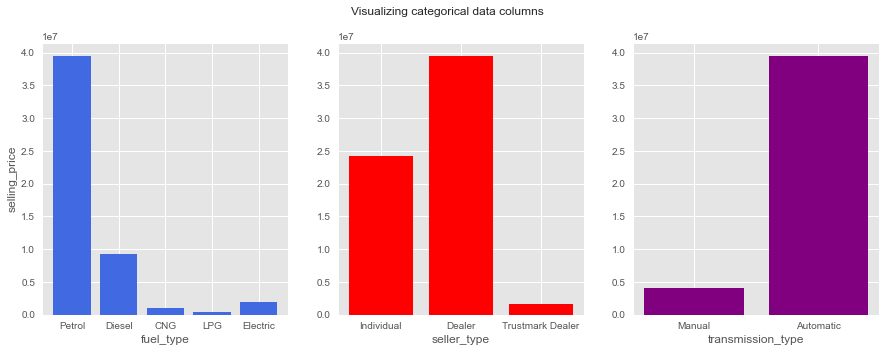

In [16]:
style.use('ggplot')
fig = plt.figure(figsize=(15,5))
fig.suptitle('Visualizing categorical data columns')
plt.subplot(1,3,1)
plt.bar(fuel_type,selling_price, color='royalblue')
plt.xlabel("fuel_type")
plt.ylabel("selling_price")
plt.subplot(1,3,2)
plt.bar(seller_type, selling_price, color='red')
plt.xlabel("seller_type")
plt.subplot(1,3,3)
plt.bar(transmission_type, selling_price, color='purple')
plt.xlabel('transmission_type')
plt.show()

<AxesSubplot:xlabel='transmission_type', ylabel='selling_price'>

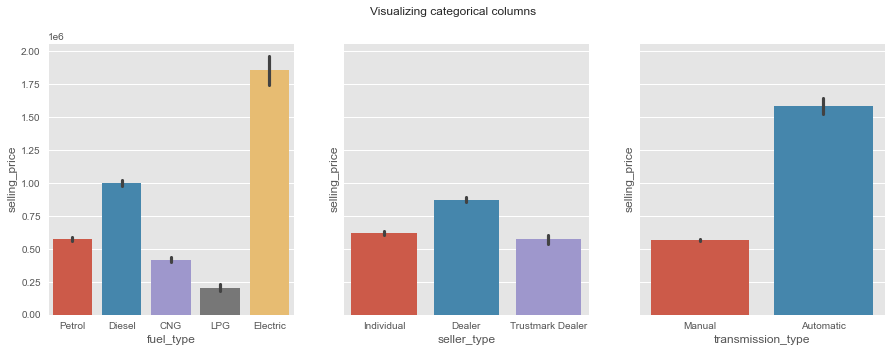

In [17]:
fig, axes = plt.subplots(1,3,figsize=(15,5), sharey=True)
fig.suptitle('Visualizing categorical columns')
sns.barplot(x=fuel_type, y=selling_price, ax=axes[0])
sns.barplot(x=seller_type, y=selling_price, ax=axes[1])
sns.barplot(x=transmission_type, y=selling_price, ax=axes[2])

In [18]:
petrol_data = df.groupby('fuel_type').get_group('Petrol')
petrol_data.describe()

,Unnamed: 0,min_cost_price,max_cost_price,vehicle_age,km_driven,mileage,engine,max_power,seats,selling_price
count,7643.000000,7.643000e+03,7.643000e+03,7643.000000,7643.000000,7643.000000,7643.000000,7643.000000,7643.000000,7.643000e+03
mean,9884.958001,5.420616e+06,1.422928e+06,5.986654,42544.360853,19.123045,1243.744603,88.897466,5.054298,5.728619e+05
std,5691.327444,5.200969e+07,2.811268e+06,3.347505,30818.668069,2.929905,363.577597,37.349753,0.360375,8.001486e+05
min,0.000000,3.110000e+05,4.360000e+05,0.000000,100.000000,4.000000,796.000000,46.300000,0.000000,4.000000e+04
25%,4824.000000,5.453481e+05,7.100000e+05,3.000000,21000.000000,17.400000,999.000000,67.100000,5.000000,3.200000e+05
50%,10101.000000,6.960000e+05,9.860000e+05,5.000000,38872.000000,18.900000,1197.000000,81.860000,5.000000,4.600000e+05
75%,14759.500000,8.950000e+05,1.336000e+06,8.000000,58000.000000,20.920000,1298.000000,94.680000,5.000000,6.450000e+05
max,19543.000000,8.607000e+08,9.110000e+07,29.000000,820000.000000,28.090000,6592.000000,626.000000,8.000000,3.950000e+07


In [19]:
seller_data = df.groupby('seller_type').get_group('Dealer')
seller_data.describe()

,Unnamed: 0,min_cost_price,max_cost_price,vehicle_age,km_driven,mileage,engine,max_power,seats,selling_price
count,9539.000000,9.539000e+03,9.539000e+03,9539.000000,9.539000e+03,9539.000000,9539.000000,9539.000000,9539.000000,9.539000e+03
mean,10086.917182,8.158950e+06,2.296532e+06,6.144564,5.363960e+04,19.439651,1532.973687,106.832712,5.294161,8.725055e+05
std,5571.259701,6.809091e+07,3.285819e+06,2.845679,5.542358e+04,4.270376,542.809804,47.398940,0.771734,1.024214e+06
min,4.000000,3.110000e+05,4.440000e+05,0.000000,1.000000e+03,4.000000,793.000000,38.400000,2.000000,5.500000e+04
25%,4966.500000,6.810000e+05,9.202026e+05,4.000000,3.200000e+04,16.700000,1197.000000,78.900000,5.000000,4.145000e+05
50%,10652.000000,9.120000e+05,1.323333e+06,6.000000,5.000000e+04,19.100000,1396.000000,88.760000,5.000000,5.910000e+05
75%,14695.500000,1.449000e+06,1.991000e+06,8.000000,6.800000e+04,22.320000,1598.000000,121.300000,5.000000,8.900000e+05
max,19543.000000,9.680667e+08,5.840000e+07,29.000000,3.800000e+06,33.540000,5998.000000,626.000000,9.000000,3.950000e+07


In [20]:
print(df['fuel_type'].value_counts())

Petrol      7643
Diesel      7419
CNG          301
LPG           44
Electric       4
Name: fuel_type, dtype: int64


In [21]:
df.replace({'fuel_type':{'Petrol':0, 'Diesel':1, 'CNG':2,'LPG':3,'Electric':4}}, inplace=True)


In [22]:
df = pd.get_dummies(df, columns=['seller_type'], drop_first=True)

In [23]:
df = pd.get_dummies(df, columns=['transmission_type'], drop_first=True)

In [24]:
df.head()

,Unnamed: 0,car_name,brand,model,min_cost_price,max_cost_price,vehicle_age,km_driven,fuel_type,mileage,engine,max_power,seats,selling_price,seller_type_Individual,seller_type_Trustmark Dealer,transmission_type_Manual
0,0,Maruti Alto,Maruti,Alto,3.570039e+05,4.654015e+05,9,120000,0,19.70,796,46.30,5,120000,1,0,1
1,1,Hyundai Grand,Hyundai,Grand,7.110000e+05,7.480000e+05,5,20000,0,18.90,1197,82.00,5,550000,1,0,1
2,2,Hyundai i20,Hyundai,i20,8.540829e+05,1.307926e+06,11,60000,0,17.00,1197,80.00,5,215000,1,0,1
3,3,Maruti Alto,Maruti,Alto,3.570039e+05,4.654015e+05,9,37000,0,20.92,998,67.10,5,226000,1,0,1
4,4,Ford Ecosport,Ford,Ecosport,1.014000e+06,1.379000e+06,6,30000,1,22.77,1498,98.59,5,570000,0,0,1


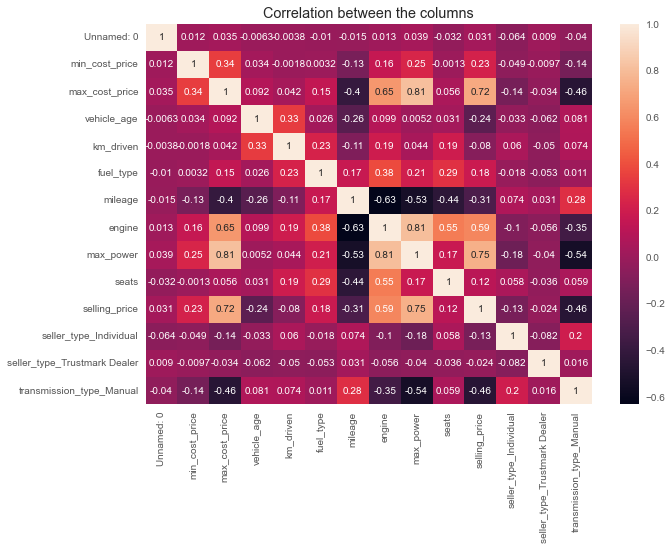

In [25]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(), annot=True)
plt.title('Correlation between the columns')
plt.show()

In [ ]:
fig = plt.figure(figsize=(7,5))
plt.title('Correlation between year and price')
sns.regplot(x='price', y='year', data=df)


<AxesSubplot:title={'center':'Correlation between present price and selling price'}, xlabel='min_cost_price', ylabel='selling_price'>

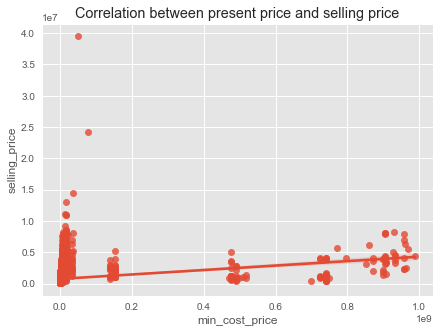

In [26]:
fig=plt.figure(figsize=(7,5))
plt.title('Correlation between present price and selling price')
sns.regplot(x='min_cost_price', y='selling_price', data=df)

<AxesSubplot:title={'center':'Correlation between present price and selling price'}, xlabel='max_cost_price', ylabel='selling_price'>

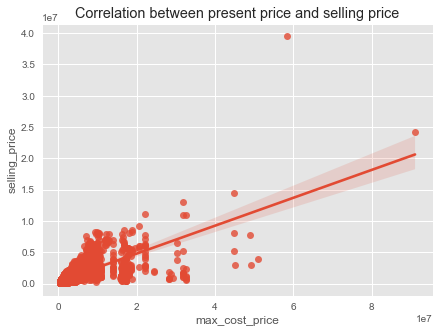

In [27]:
fig=plt.figure(figsize=(7,5))
plt.title('Correlation between present price and selling price')
sns.regplot(x='max_cost_price', y='selling_price', data=df)

In [28]:
X = df.drop(['car_name','brand','model','selling_price'], axis=1)
y = df['selling_price']

In [29]:
print("Shape of X is: ",X.shape)
print("Shape of y is: ", y.shape)

Shape of X is:  (15411, 13)
Shape of y is:  (15411,)


In [30]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)


In [31]:
print("X_test shape:", X_test.shape)
print("X_train shape:", X_train.shape)
print("y_test shape: ", y_test.shape)
print("y_train shape:", y_train.shape)

X_test shape: (4624, 13)
X_train shape: (10787, 13)
y_test shape:  (4624,)
y_train shape: (10787,)


In [32]:
scaler = StandardScaler()


In [33]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [34]:
model = LinearRegression()


In [35]:
model.fit(X_train, y_train)


LinearRegression()

In [36]:
pred = model.predict(X_test)


In [37]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [38]:
print("MAE: ", (metrics.mean_absolute_error(pred, y_test)))
print("MSE: ", (metrics.mean_squared_error(pred, y_test)))
print("R2 score: ", (metrics.r2_score(pred, y_test)))

MAE:  235957.91362675664
MSE:  227518599557.441
R2 score:  0.5766377145014974


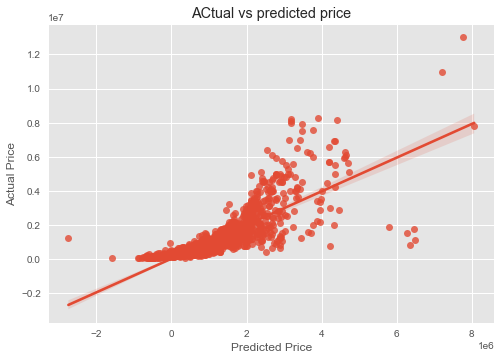

In [39]:
sns.regplot(x=pred, y=y_test)
plt.xlabel("Predicted Price")
plt.ylabel('Actual Price')
plt.title("ACtual vs predicted price")
plt.show()

In [40]:

dtree = DecisionTreeRegressor()
dtree.fit(X_train, y_train)
dtree_pred = dtree.predict(X_test)

In [41]:

dtree_mae = mean_absolute_error(y_test, dtree_pred)
dtree_r2 = r2_score(y_test, dtree_pred)
print("MAE of decision tree model is:", dtree_mae)
print("R2 score of decision tree model is:", dtree_r2)


MAE of decision tree model is: 118615.24113321799
R2 score of decision tree model is: 0.9141464357714973


In [42]:
dtree_score = cross_val_score(dtree, X_test, y_test, cv=4)
print("Decision Tree model accuracy is: {}".format(dtree_score.mean()*100))

Decision Tree model accuracy is: 88.29045562491731


In [43]:
dtree_score = cross_val_score(dtree, X_test, y_test, cv=4)
print("Decision Tree model accuracy is: {}".format(dtree_score.mean()*100))

Decision Tree model accuracy is: 86.69141020599339


In [44]:
xgb = XGBRegressor()
xgb.fit(X_train, y_train)
xgb_pred = xgb.predict(X_test)


In [45]:

xgb_mae = mean_absolute_error(y_test, xgb_pred)
xgb_r2 = r2_score(y_test, xgb_pred)
print("MAE of xgboost model is:", xgb_mae)
print("R2 score of xgboost model is:", xgb_r2)

MAE of xgboost model is: 86560.57695075963
R2 score of xgboost model is: 0.9530572413909025


In [46]:

xgb_score = cross_val_score(xgb, X_test, y_test, cv=4)
print("Decision Tree model accuracy is: {}".format(xgb_score.mean()*100))

Decision Tree model accuracy is: 91.3476398754908


In [47]:
from pyspark.sql import *
import pyspark
from pyspark.sql import SparkSession
spark=SparkSession.builder.appName('Dataframe').getOrCreate()

In [48]:
file_location="C:\\Users\\91909\\Downloads\\MACINE_LEARNING\\PROJECT\\cars_info.csv"
file_type="csv"
df=spark.read.csv(file_location,header=True,inferSchema=True)
df.show()

+---+--------------------+-------------+-----------+------------------+------------------+-----------+---------+-----------+---------+-----------------+-------+------+---------+-----+-------------+
|_c0|            car_name|        brand|      model|    min_cost_price|    max_cost_price|vehicle_age|km_driven|seller_type|fuel_type|transmission_type|mileage|engine|max_power|seats|selling_price|
+---+--------------------+-------------+-----------+------------------+------------------+-----------+---------+-----------+---------+-----------------+-------+------+---------+-----+-------------+
|  0|         Maruti Alto|       Maruti|       Alto|  357003.861003861| 465401.5444015444|          9|   120000| Individual|   Petrol|           Manual|   19.7|   796|     46.3|    5|       120000|
|  1|       Hyundai Grand|      Hyundai|      Grand|          711000.0|          748000.0|          5|    20000| Individual|   Petrol|           Manual|   18.9|  1197|     82.0|    5|       550000|
|  2|     

In [49]:
spark

In [50]:
df.describe().show()

+-------+-----------------+----------+-----+------------------+--------------------+------------------+------------------+-----------------+----------------+---------+-----------------+------------------+------------------+-----------------+-----------------+-----------------+
|summary|              _c0|  car_name|brand|             model|      min_cost_price|    max_cost_price|       vehicle_age|        km_driven|     seller_type|fuel_type|transmission_type|           mileage|            engine|        max_power|            seats|    selling_price|
+-------+-----------------+----------+-----+------------------+--------------------+------------------+------------------+-----------------+----------------+---------+-----------------+------------------+------------------+-----------------+-----------------+-----------------+
|  count|            15411|     15411|15411|             15411|               15411|             15411|             15411|            15411|           15411|    15411

In [51]:
df.columns

['_c0',
 'car_name',
 'brand',
 'model',
 'min_cost_price',
 'max_cost_price',
 'vehicle_age',
 'km_driven',
 'seller_type',
 'fuel_type',
 'transmission_type',
 'mileage',
 'engine',
 'max_power',
 'seats',
 'selling_price']

In [52]:
df.printSchema()

root
 |-- _c0: integer (nullable = true)
 |-- car_name: string (nullable = true)
 |-- brand: string (nullable = true)
 |-- model: string (nullable = true)
 |-- min_cost_price: double (nullable = true)
 |-- max_cost_price: double (nullable = true)
 |-- vehicle_age: integer (nullable = true)
 |-- km_driven: integer (nullable = true)
 |-- seller_type: string (nullable = true)
 |-- fuel_type: string (nullable = true)
 |-- transmission_type: string (nullable = true)
 |-- mileage: double (nullable = true)
 |-- engine: integer (nullable = true)
 |-- max_power: double (nullable = true)
 |-- seats: integer (nullable = true)
 |-- selling_price: integer (nullable = true)



In [53]:
from pyspark.ml.feature import StringIndexer

In [54]:
indexer= StringIndexer(inputCols=['model','fuel_type','seller_type','transmission_type'],outputCols=['model_indexed','fuel_type_indexed','seller_type_indexed','transmission_type_indexed'])
df_r=indexer.fit(df).transform(df)
df_r.show()

+---+--------------------+-------------+-----------+------------------+------------------+-----------+---------+-----------+---------+-----------------+-------+------+---------+-----+-------------+-------------+-----------------+-------------------+-------------------------+
|_c0|            car_name|        brand|      model|    min_cost_price|    max_cost_price|vehicle_age|km_driven|seller_type|fuel_type|transmission_type|mileage|engine|max_power|seats|selling_price|model_indexed|fuel_type_indexed|seller_type_indexed|transmission_type_indexed|
+---+--------------------+-------------+-----------+------------------+------------------+-----------+---------+-----------+---------+-----------------+-------+------+---------+-----+-------------+-------------+-----------------+-------------------+-------------------------+
|  0|         Maruti Alto|       Maruti|       Alto|  357003.861003861| 465401.5444015444|          9|   120000| Individual|   Petrol|           Manual|   19.7|   796|     

In [55]:
df.printSchema()

root
 |-- _c0: integer (nullable = true)
 |-- car_name: string (nullable = true)
 |-- brand: string (nullable = true)
 |-- model: string (nullable = true)
 |-- min_cost_price: double (nullable = true)
 |-- max_cost_price: double (nullable = true)
 |-- vehicle_age: integer (nullable = true)
 |-- km_driven: integer (nullable = true)
 |-- seller_type: string (nullable = true)
 |-- fuel_type: string (nullable = true)
 |-- transmission_type: string (nullable = true)
 |-- mileage: double (nullable = true)
 |-- engine: integer (nullable = true)
 |-- max_power: double (nullable = true)
 |-- seats: integer (nullable = true)
 |-- selling_price: integer (nullable = true)



In [62]:
from pyspark.ml.feature import VectorAssembler
featureassembler=VectorAssembler(inputCols=['model_indexed','fuel_type_indexed','seller_type_indexed','transmission_type_indexed','vehicle_age','km_driven','mileage','seats','min_cost_price'],outputCol='Independent Features')
output=featureassembler.transform(df_r)

In [63]:
output.select('Independent Features').show()

+--------------------+
|Independent Features|
+--------------------+
|[3.0,0.0,1.0,0.0,...|
|[6.0,0.0,1.0,0.0,...|
|[0.0,0.0,1.0,0.0,...|
|[3.0,0.0,1.0,0.0,...|
|[10.0,1.0,0.0,0.0...|
|[5.0,0.0,1.0,0.0,...|
|[9.0,0.0,0.0,0.0,...|
|[5.0,0.0,0.0,0.0,...|
|[50.0,0.0,1.0,1.0...|
|[2.0,0.0,0.0,0.0,...|
|[8.0,1.0,0.0,0.0,...|
|[24.0,1.0,1.0,0.0...|
|[74.0,0.0,0.0,1.0...|
|[14.0,1.0,0.0,0.0...|
|[2.0,1.0,1.0,0.0,...|
|[35.0,1.0,0.0,1.0...|
|[2.0,1.0,0.0,0.0,...|
|[7.0,1.0,1.0,0.0,...|
|[12.0,0.0,1.0,0.0...|
|[1.0,0.0,1.0,0.0,...|
+--------------------+
only showing top 20 rows



In [64]:
finalized_data=output.select('Independent Features','selling_price')

In [65]:
from pyspark.ml.regression import LinearRegression
train_data,test_data=finalized_data.randomSplit([0.75,0.25])
regressor=LinearRegression(featuresCol="Independent Features",labelCol="selling_price")
regressor=regressor.fit(train_data)

In [66]:
pred_results=regressor.evaluate(test_data)


In [61]:
pred_results.predictions.show()

+--------------------+-------------+------------------+
|Independent Features|selling_price|        prediction|
+--------------------+-------------+------------------+
|[0.0,718000.0,118...|       500000| 351938.0433606275|
|[0.0,718000.0,118...|       400000| 337894.2942336486|
|[0.0,756000.0,125...|       650000| 678143.3367860245|
|[0.0,756000.0,125...|       650000| 595728.6072396054|
|[0.0,756000.0,125...|       550000| 590327.1652676904|
|[0.0,757000.0,125...|       699000| 709955.9612768249|
|[0.0,757000.0,125...|       645000|  674476.050536848|
|[0.0,757000.0,125...|       550000| 602960.8897488124|
|[0.0,757000.0,125...|       499000| 543232.2164844362|
|[0.0,757000.0,125...|       215000|111744.21354079564|
|[0.0,763000.0,126...|       500000| 561871.7484062728|
|[0.0,763000.0,126...|       475000|439713.68089156284|
|[0.0,770000.0,127...|       600000| 763982.7965295975|
|[0.0,770000.0,127...|       450000| 590245.5852664541|
|[0.0,770000.0,127...|       210000|43410.288951